## Algoritmo de Regressão Linear Simples 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

class LinearRegression:
    def __init__(self):
        self.coef = None
        self.intercept = None
        self.equation = None
    
    def fit(self, X_, Y_):
        X = np.array(X_)
        Y = np.array(Y_)
        self.setParameters(X, Y)
        self.equation = lambda _x : self.coef * _x + self.intercept

    def setParameters(self, X, Y):
        n = len(X)
        sum_x_squared = sum(X * X)
        self.coef = (sum(X * Y) - n * X.mean() * Y.mean()) / (sum_x_squared - n * X.mean() ** 2) 
        self.intercept = Y.mean() - self.coef * X.mean()
    
    def getParameters(self):
        return self.coef, self.intercept

    def predict(self, X):
        return np.array(list(map(self.equation, X)))

    def sum_residual_quadratic(self, X, Y):
        return sum((Y - self.predict(X)) ** 2)
    
    def sum_total_quadratic(self, X, Y):
        return sum((Y - Y.mean()) ** 2)

    def score(self, X, Y):
        return 1 - self.sum_residual_quadratic(X, Y) / self.sum_total_quadratic(X, Y)

### Aplicação do algoritmo utilizando a base de dados boston

In [38]:
model = LinearRegression()
X = boston.data[:,0]
Y = boston.target
model.fit(X, Y)
print("Coeficiente de Determinação R^2")
print(model.score(X, Y))
print("Equação: %f*X + %f" % (model.coef, model.intercept))

Coeficiente de Determinação R^2
0.1507804690497574
Equação: -0.415190*X + 24.033106


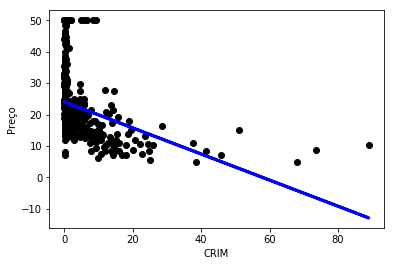

In [39]:
y_pred = model.predict(X)
plt.scatter(X, Y,  color='black')
plt.plot(X, y_pred , color='blue', linewidth=3)
plt.xlabel(boston.feature_names[0])
plt.ylabel('Preço')
plt.show()

In [40]:
model = LinearRegression()
X = boston.data[:,5]
Y = boston.target
model.fit(X, Y)
print("Coeficiente de Determinação R^2: %f" % (model.score(X, Y)))
print("Equação: %f*X + %f" % (model.coef, model.intercept))

Coeficiente de Determinação R^2: 0.483525
Equação: 9.102109*X + -34.670621


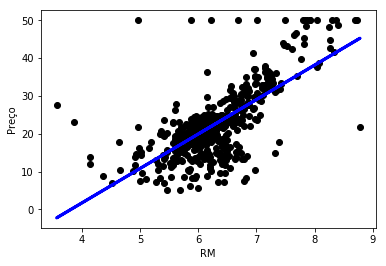

In [41]:
y_pred = model.predict(X)
plt.scatter(X, Y,  color='black')
plt.plot(X, y_pred , color='blue', linewidth=3)
plt.xlabel(boston.feature_names[5])
plt.ylabel('Preço')
plt.show()

### Coeficiente de Correlação Linear de Pearson

In [45]:
dados = pd.DataFrame(boston.data, columns= boston.feature_names)
print(dados.corr(method='pearson'))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

A coorelação entre INDUS e NOX é de 0.763651, o que é considerado alto.

In [47]:
model = LinearRegression()
X = boston.data[:,2]
Y = boston.data[:,4]
model.fit(X, Y)
print("Coeficiente de Determinação R^2: %f" % (model.score(X, Y)))
print("Equação: %f*X + %f" % (model.coef, model.intercept))

Coeficiente de Determinação R^2: 0.583164
Equação: 0.012899*X + 0.411044
